COVID-19 Detection using CT Scans

Section 1: Import Necessary Libraries

In [4]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from keras.models import Sequential
from keras.layers import Dense, GlobalAveragePooling2D
from keras.applications import VGG16, VGG19
from keras.callbacks import EarlyStopping
from keras.optimizers import Adam

Section 2: Load the Dataset

In [5]:
data_dir = 'C:/Users/user/Documents/Learning Course and Material/Project/Covid-19(2)/datasets'
image_extensions = ('.png', '.jpg', '.jpeg', '.bmp', '.tiff')
images = []
labels = []

for folder in os.listdir(data_dir):
    folder_path = os.path.join(data_dir, folder)
    if os.path.isdir(folder_path):
        for img_file in os.listdir(folder_path):
            if img_file.lower().endswith(image_extensions):
                img_path = os.path.join(folder_path, img_file)
                img = cv2.imread(img_path)
                if img is not None:
                    img = cv2.resize(img, (128, 128))  # Resize images to 128x128
                    images.append(img)
                    labels.append(0 if folder == 'CT_COVID' else 1)

images = np.array(images)
labels_encoded = np.array(labels)

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(images, labels_encoded, test_size=0.2, random_state=42)

print(f"Number of training samples: {len(X_train)}")
print(f"Number of testing samples: {len(X_test)}")

Number of training samples: 596
Number of testing samples: 150


Section 3: Model 1 - VGG16

In [6]:
vgg16_model = VGG16(weights='imagenet', include_top=False, input_shape=(128, 128, 3))
model_vgg16 = Sequential()
model_vgg16.add(vgg16_model)
model_vgg16.add(GlobalAveragePooling2D())
model_vgg16.add(Dense(2, activation='softmax'))

model_vgg16.compile(optimizer=Adam(lr=0.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

Section 4: Train Model 1 - VGG16

In [7]:
early_stopping = EarlyStopping(monitor='val_loss', patience=5, verbose=1, restore_best_weights=True)
history_vgg16 = model_vgg16.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), callbacks=[early_stopping])

# Evaluate Model 1 - VGG16
test_loss_vgg16, test_accuracy_vgg16 = model_vgg16.evaluate(X_test, y_test)
print(f'Model VGG16 Test Accuracy: {test_accuracy_vgg16 * 100:.2f}%')

Epoch 1/50
19/19 [==============================] - 144s 8s/step - loss: 2.2034 - accuracy: 0.5570 - val_loss: 0.5930 - val_accuracy: 0.6667
Epoch 2/50
19/19 [==============================] - 143s 8s/step - loss: 0.6022 - accuracy: 0.6896 - val_loss: 0.5228 - val_accuracy: 0.7400
Epoch 3/50
19/19 [==============================] - 141s 7s/step - loss: 0.5579 - accuracy: 0.7299 - val_loss: 0.4953 - val_accuracy: 0.7667
Epoch 4/50
19/19 [==============================] - 131s 7s/step - loss: 0.4804 - accuracy: 0.7601 - val_loss: 0.5459 - val_accuracy: 0.7200
Epoch 5/50
19/19 [==============================] - 124s 7s/step - loss: 0.5045 - accuracy: 0.7416 - val_loss: 0.5326 - val_accuracy: 0.7800
Epoch 6/50
19/19 [==============================] - 124s 7s/step - loss: 0.4895 - accuracy: 0.7668 - val_loss: 0.5138 - val_accuracy: 0.7333
Epoch 7/50
19/19 [==============================] - 122s 6s/step - loss: 0.5023 - accuracy: 0.7366 - val_loss: 0.4625 - val_accuracy: 0.8267
Epoch 8/50
19

Section 5: Model 2 - VGG19

In [8]:
vgg19_model = VGG19(weights='imagenet', include_top=False, input_shape=(128, 128, 3))
model_vgg19 = Sequential()
model_vgg19.add(vgg19_model)
model_vgg19.add(GlobalAveragePooling2D())
model_vgg19.add(Dense(2, activation='softmax'))

model_vgg19.compile(optimizer=Adam(lr=0.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

80142336/80134624 [==============================] - 33s 0us/step


Section 6: Train Model 2 - VGG19

In [9]:
history_vgg19 = model_vgg19.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), callbacks=[early_stopping])

# Evaluate Model 2 - VGG19
test_loss_vgg19, test_accuracy_vgg19 = model_vgg19.evaluate(X_test, y_test)
print(f'Model VGG19 Test Accuracy: {test_accuracy_vgg19 * 100:.2f}%')

Epoch 1/50
19/19 [==============================] - 158s 8s/step - loss: 2.1604 - accuracy: 0.5201 - val_loss: 0.8504 - val_accuracy: 0.4667
Epoch 2/50
19/19 [==============================] - 160s 8s/step - loss: 0.6731 - accuracy: 0.5990 - val_loss: 0.7171 - val_accuracy: 0.5333
Epoch 3/50
19/19 [==============================] - 182s 10s/step - loss: 0.6869 - accuracy: 0.5436 - val_loss: 0.6413 - val_accuracy: 0.5933
Epoch 4/50
19/19 [==============================] - 162s 9s/step - loss: 0.6556 - accuracy: 0.6124 - val_loss: 0.7498 - val_accuracy: 0.5267
Epoch 5/50
19/19 [==============================] - 159s 8s/step - loss: 0.6638 - accuracy: 0.5956 - val_loss: 0.6246 - val_accuracy: 0.6333
Epoch 6/50
19/19 [==============================] - 156s 8s/step - loss: 0.6319 - accuracy: 0.6510 - val_loss: 0.6575 - val_accuracy: 0.6267
Epoch 7/50
19/19 [==============================] - 159s 8s/step - loss: 0.5881 - accuracy: 0.6930 - val_loss: 0.6082 - val_accuracy: 0.6400
Epoch 8/50
1

Section 7: Compare Results

In [10]:
print("\nComparison of Model Accuracies:")
print(f"VGG16 Accuracy: {test_accuracy_vgg16 * 100:.2f}%")
print(f"VGG19 Accuracy: {test_accuracy_vgg19 * 100:.2f}%")


Comparison of Model Accuracies:
VGG16 Accuracy: 83.33%
VGG19 Accuracy: 75.33%


Section 8: Plotting Accuracy for Both Models

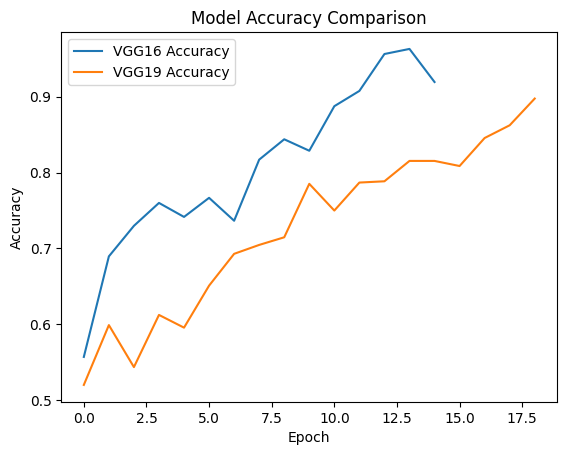

In [11]:
plt.plot(history_vgg16.history['accuracy'], label='VGG16 Accuracy')
plt.plot(history_vgg19.history['accuracy'], label='VGG19 Accuracy')
plt.title('Model Accuracy Comparison')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()

Section 9: Confusion Matrix for Both Models

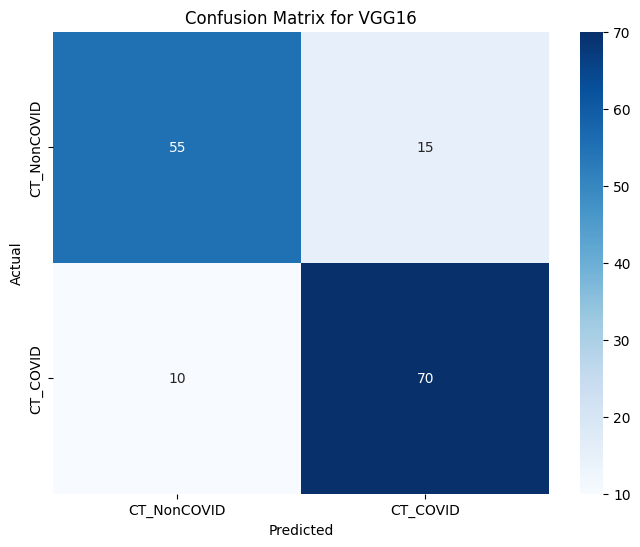

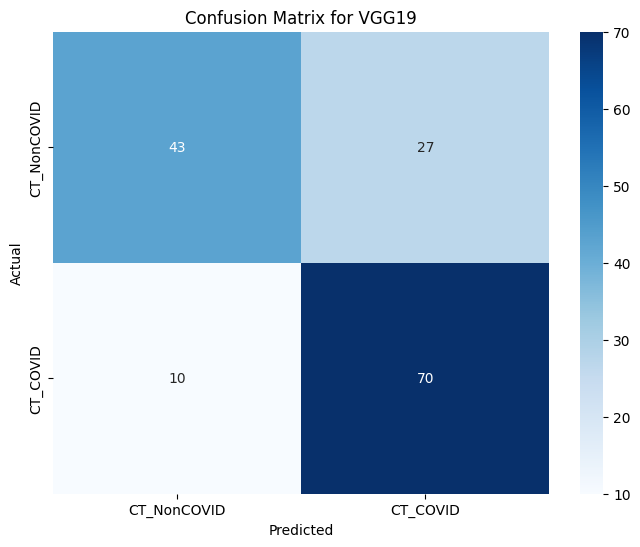

In [12]:
def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['CT_NonCOVID', 'CT_COVID'], yticklabels=['CT_NonCOVID', 'CT_COVID'])
    plt.title(title)
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

# Confusion Matrix for VGG16
y_pred_vgg16 = np.argmax(model_vgg16.predict(X_test), axis=1)
plot_confusion_matrix(y_test, y_pred_vgg16, 'Confusion Matrix for VGG16')

# Confusion Matrix for VGG19
y_pred_vgg19 = np.argmax(model_vgg19.predict(X_test), axis=1)
plot_confusion_matrix(y_test, y_pred_vgg19, 'Confusion Matrix for VGG19')

Section 10: Print Classification Reports for Both Models

In [13]:
print("\nClassification Report for VGG16:")
print(classification_report(y_test, y_pred_vgg16))

print("\nClassification Report for VGG19:")
print(classification_report(y_test, y_pred_vgg19))


Classification Report for VGG16:
              precision    recall  f1-score   support

           0       0.85      0.79      0.81        70
           1       0.82      0.88      0.85        80

    accuracy                           0.83       150
   macro avg       0.83      0.83      0.83       150
weighted avg       0.83      0.83      0.83       150


Classification Report for VGG19:
              precision    recall  f1-score   support

           0       0.81      0.61      0.70        70
           1       0.72      0.88      0.79        80

    accuracy                           0.75       150
   macro avg       0.77      0.74      0.75       150
weighted avg       0.76      0.75      0.75       150



Plotting Training and Validation Loss/Accuracy

Plot Training and Validation Loss

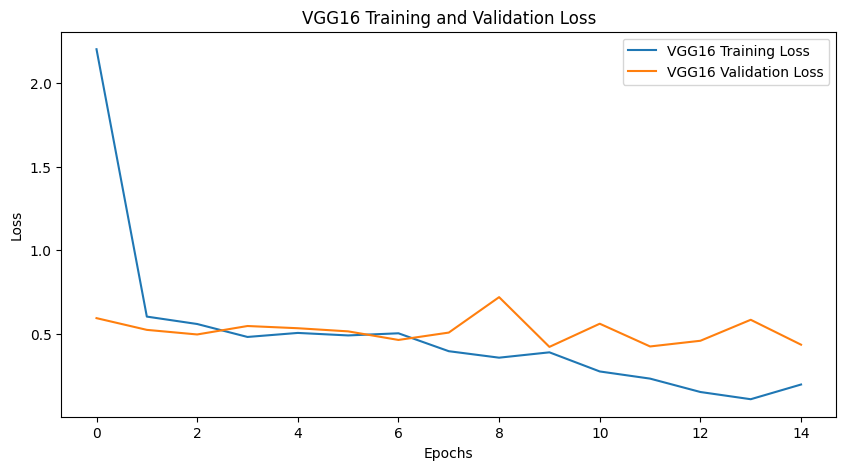

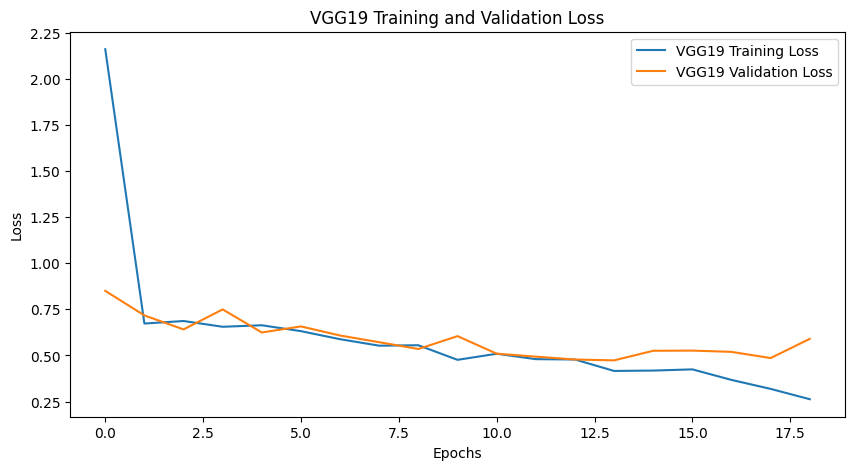

In [19]:
import matplotlib.pyplot as plt

# Plot loss for VGG16
plt.figure(figsize=(10, 5))
plt.plot(history_vgg16.history['loss'], label='VGG16 Training Loss')
plt.plot(history_vgg16.history['val_loss'], label='VGG16 Validation Loss')
plt.title('VGG16 Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot loss for VGG19
plt.figure(figsize=(10, 5))
plt.plot(history_vgg19.history['loss'], label='VGG19 Training Loss')
plt.plot(history_vgg19.history['val_loss'], label='VGG19 Validation Loss')
plt.title('VGG19 Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

Plot Training and Validation Accuracy

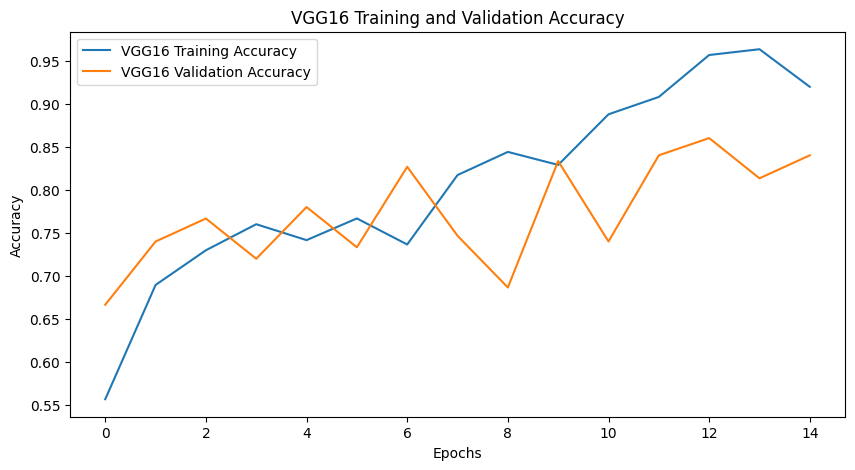

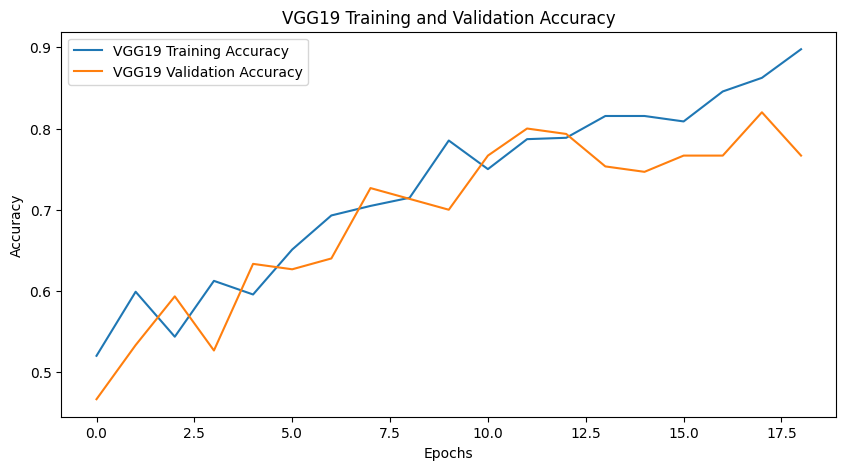

In [20]:
# Plot accuracy for VGG16
plt.figure(figsize=(10, 5))
plt.plot(history_vgg16.history['accuracy'], label='VGG16 Training Accuracy')
plt.plot(history_vgg16.history['val_accuracy'], label='VGG16 Validation Accuracy')
plt.title('VGG16 Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot accuracy for VGG19
plt.figure(figsize=(10, 5))
plt.plot(history_vgg19.history['accuracy'], label='VGG19 Training Accuracy')
plt.plot(history_vgg19.history['val_accuracy'], label='VGG19 Validation Accuracy')
plt.title('VGG19 Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


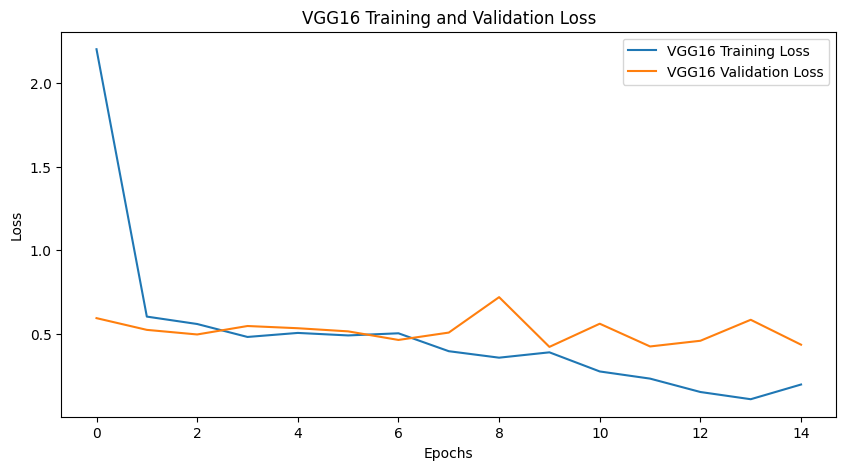

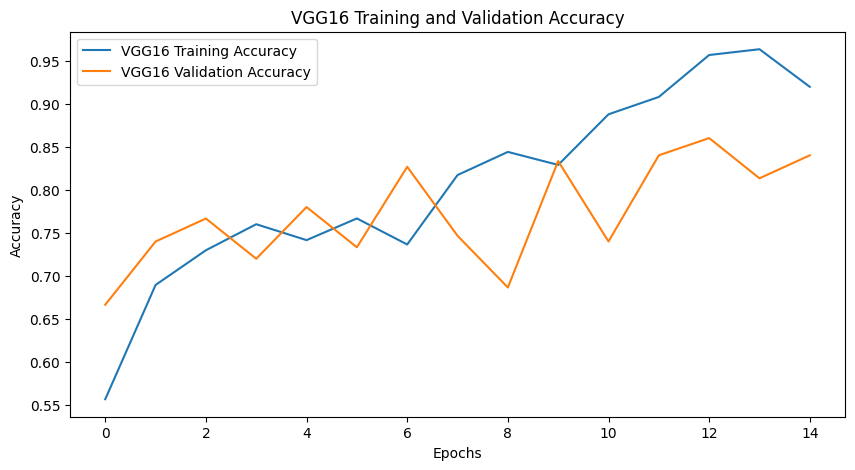

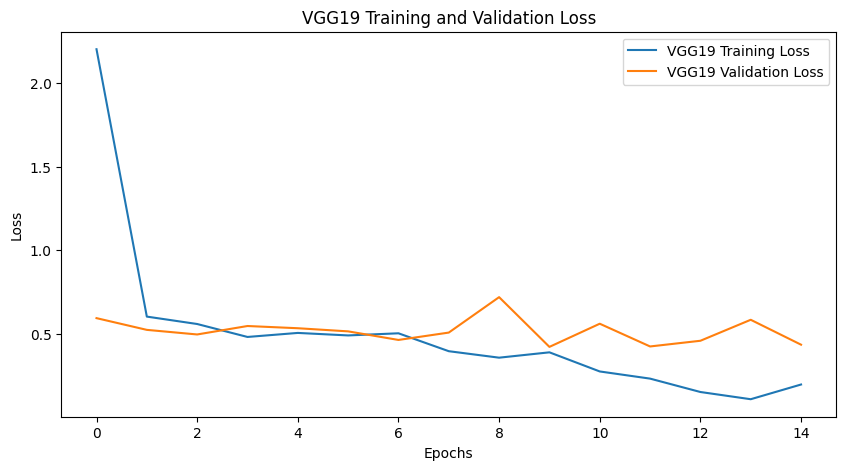

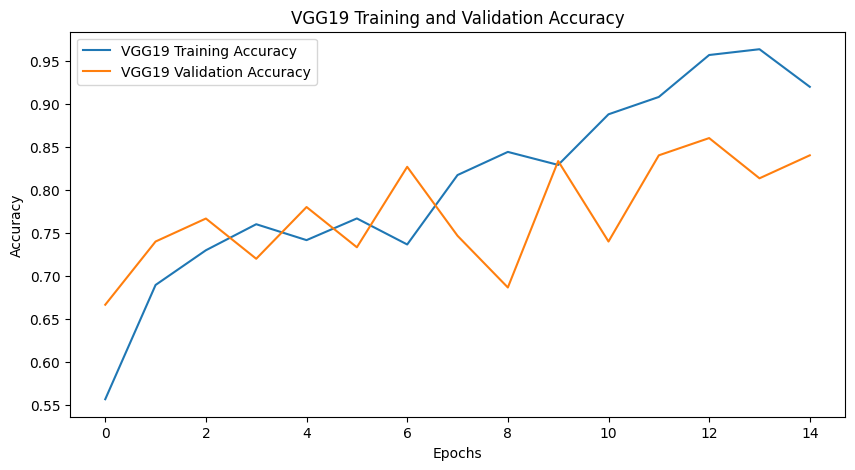

In [21]:
# Save VGG16 loss plot
plt.figure(figsize=(10, 5))
plt.plot(history_vgg16.history['loss'], label='VGG16 Training Loss')
plt.plot(history_vgg16.history['val_loss'], label='VGG16 Validation Loss')
plt.title('VGG16 Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.savefig('vgg16_loss_plot.png')

# Save VGG16 accuracy plot
plt.figure(figsize=(10, 5))
plt.plot(history_vgg16.history['accuracy'], label='VGG16 Training Accuracy')
plt.plot(history_vgg16.history['val_accuracy'], label='VGG16 Validation Accuracy')
plt.title('VGG16 Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.savefig('vgg16_accuracy_plot.png')

# Save VGG19 loss plot
plt.figure(figsize=(10, 5))
plt.plot(history_vgg16.history['loss'], label='VGG19 Training Loss')
plt.plot(history_vgg16.history['val_loss'], label='VGG19 Validation Loss')
plt.title('VGG19 Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.savefig('vgg19_loss_plot.png')

# Save VGG19 accuracy plot
plt.figure(figsize=(10, 5))
plt.plot(history_vgg16.history['accuracy'], label='VGG19 Training Accuracy')
plt.plot(history_vgg16.history['val_accuracy'], label='VGG19 Validation Accuracy')
plt.title('VGG19 Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.savefig('vgg19_accuracy_plot.png')


Saving the Model Weights and Architecture

In [14]:
# Save the VGG16 model
model_vgg16.save('vgg16_covid_model.h5')

# Save the VGG19 model
model_vgg19.save('vgg19_covid_model.h5')

Load Saved Model

In [15]:
from keras.models import load_model

# Load the saved VGG16 model
loaded_model_vgg16 = load_model('vgg16_covid_model.h5')

# Load the saved VGG19 model
loaded_model_vgg19 = load_model('vgg19_covid_model.h5')

Saving the Training History

In [16]:
import json

# Save VGG16 training history
with open('vgg16_history.json', 'w') as f:
    json.dump(history_vgg16.history, f)

# Save VGG19 training history
with open('vgg19_history.json', 'w') as f:
    json.dump(history_vgg19.history, f)

Saving Predictions and Evaluation Results

In [17]:
import pandas as pd

# Save VGG16 predictions
y_pred_vgg16 = np.argmax(model_vgg16.predict(X_test), axis=1)
results_vgg16 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_vgg16})
results_vgg16.to_csv('vgg16_predictions.csv', index=False)

# Save VGG19 predictions
y_pred_vgg19 = np.argmax(model_vgg19.predict(X_test), axis=1)
results_vgg19 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_vgg19})
results_vgg19.to_csv('vgg19_predictions.csv', index=False)

Saving the Confusion Matrix

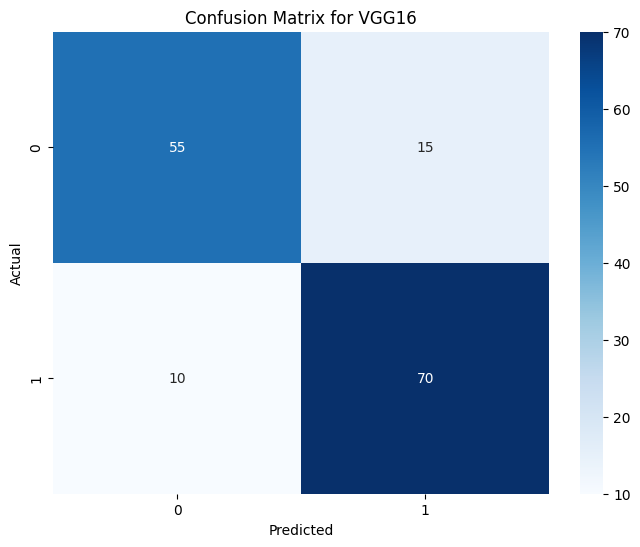

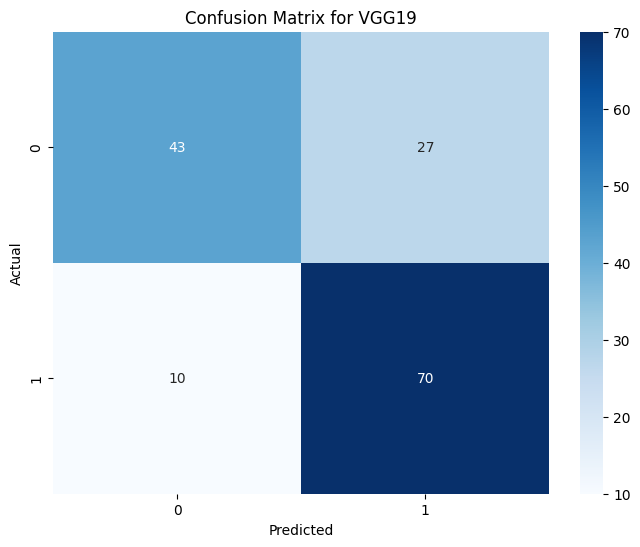

In [18]:
# Save confusion matrix for VGG16
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred_vgg16), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for VGG16')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.savefig('vgg16_confusion_matrix.png')

# Save confusion matrix for VGG19
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred_vgg19), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for VGG19')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.savefig('vgg19_confusion_matrix.png')